# Sesión 3

## Integrantes:
- Freddy Abad L.
- Edisson Reinozo T.

Este taller de ejercicios se realizó en Google Colab, si es de gusto del usuario puede visitarlo en línea en el URL: https://colab.research.google.com/drive/1N-M968rOOYuArBEQ0F1IGZqWBBOg2z5V?usp=sharing 

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

El objetivo de esta sesión de ejercicios es que el estudiante realice clasificación de textos usando las técnicas y orden adecuados.

Lineamientos generales:
- Responder a detalle las preguntas planteadas a lo largo del este documento
- Sólo mostrar en pantalla los resultados finales (los resultados intermedios no deberán mostrarse, ya que no son informativos)
- Si cuando corre su código obtiene cientos de líneas de warnings, deberá confirugar su notebook para que no muestre estos mensajes (esto dificulta tremendamente la revisión de los trabajos)
- Al momento de mostrar resultados, darle una estructura de orden o formato para facilitar el proceso de revisión (no muestre directamente listas, arrays, o diccionarios sin formato)


## Ejercicio 1

Para esta sesión se utilizará el dataset `stack-overflow-data.csv` que contiene 8521 posts al sitio `stack overflow` con sus respectivas etiquetas.

Analice y ejecute el código a continuación

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Freddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def clean_text(text):
    """Function to clean text extracted from the Internet with html tags
    
    Parameters
    ----------
    text: str 
      original string
    
    Return
    ------
    text: str
      modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text


# lectura del dataset
df = pd.read_csv('stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]

# filtrado de caracteres y stopwords
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

df['post'] = df['post'].apply(clean_text)

df.head(10)

,post,tags
0,connection iphone devices new iphone programmi...,iphone
1,append video data type image gallery overlay j...,jquery
2,difference date strings javascript trying unde...,javascript
3,exactly rails fetch data has_many belongs_to s...,ruby-on-rails
4,write code force iphone user update ios applic...,ios
5,bind json html table angularjs page load simpl...,angularjs
6,confusion using abstract class c# question sin...,c#
7,compile aspx page fly trying build aspx page r...,asp.net
8,adding new tr textboxes using jquery using jqu...,jquery
9,allocator allowed override ctors dtors value_t...,c++


In [4]:
print(df.shape)

(8521, 2)


## Ejercicio 2

Muestre un gráfico de barras con la cantidad de elementos que pertenecen cada una de las etiquetas. ¿Se puede decir que el dataset es balanceado o no? ¿Que problemas se generan de un desbalance y que opciones se tiene para este problema?

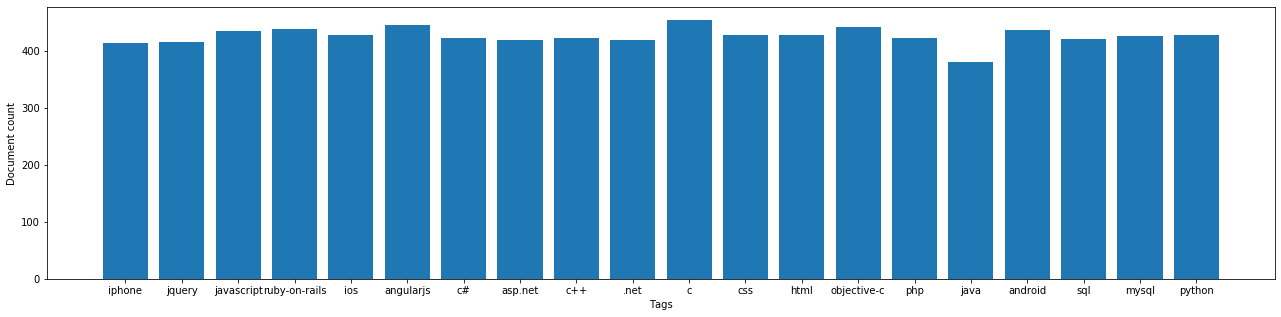

In [5]:
# inserte su código aquí
import matplotlib.pyplot as plt
import numpy as np

tags = {}
for i, doc in df.iterrows():
  tag = doc[1]
  if tag in tags:
    tags[tag] += 1
  else:
    tags[tag] = 1

def dibujar_barras_etiquetas(tags):
  graf_tags = []
  graf_vals = []
  for tag_item in tags.items():
    graf_tags.append(tag_item[0])
    graf_vals.append(tag_item[1])

  x = np.arange(len(graf_tags))

  fig, ax = plt.subplots()
  fig.set_size_inches(22, 5, forward=True)
  plt.bar(x, graf_vals)
  plt.xticks(x, graf_tags)
  plt.xlabel("Tags")
  plt.ylabel("Document count")
  plt.show()

dibujar_barras_etiquetas(tags)

**¿Se puede decir que el dataset es balanceado o no?**
Sí podemos afirmar que el dataset esta balanceado pues graficamente se muestra que el número de documentos que tiene cada etiqueta es simular.

**¿Que problemas se generan de un desbalance y que opciones se tiene para este problema?**
Los algorimtos de clasificación están diseñados bajo la suposición que el dataset esta balanceado caso contrario el accuracy y presición estarían comprometidos.

Para solucionar este problema se pueden utilizar las siguientes estrategias:

*   Recolectar más datos
*   Cambiar la métrica de rendimiento
*   Generar datos sintéticos (SMOTE)
*   Incomporar modelos con penalización

## Ejercicio 3

Usando una representación TF-IDF con unigramas, entrene 3 modelos: (1) NaiveBayes, (2) SVM; y, (3) Random Forsest para realizar clasificación. Realice un tuneado de parámetros. Muestre un gráfico de barras con los `accuracies` de los 3 modelos para este problema.  ¿El score de `Accuracy` es adecuado para este problema? analice su respuesta.

In [6]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Optener la representación TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

# Entrenamiento NaiveBayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento SVM
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vertorized, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:

from sklearn import metrics

y_pred_navive_bayes = naive_bayes_classifier.predict(X_test_vertorized)
naive_bayes_score = metrics.accuracy_score(y_test, y_pred_navive_bayes)

y_pred_svm = svm_classifier.predict(X_test_vertorized)
svm_score = metrics.accuracy_score(y_test, y_pred_svm)


y_pred_rf = rf_classifier.predict(X_test_vertorized)
rf_score = metrics.accuracy_score(y_test, y_pred_rf)

In [8]:
def autolabel(rects, other=[]):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if (len(other)== 0):
          label = round(height, 3)
        else:
          label = f"{round(other[i], 3)} s"
        ax.annotate('{}'.format(label),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

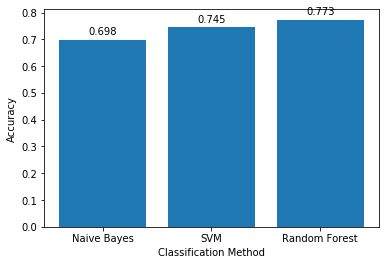

In [9]:
methos = ['Naive Bayes', 'SVM', 'Random Forest']
scores = [naive_bayes_score, svm_score, rf_score]

x = np.arange(len(scores))

fig, ax = plt.subplots()
rects = plt.bar(x, scores)
autolabel(rects)
plt.xticks(x, methos)
plt.xlabel("Classification Method")
plt.ylabel("Accuracy")
plt.show()

**¿El score de Accuracy es adecuado para este problema?**

El score del accuracy en los 3 casos es aceptable (ya que es mayor a 60%), sin embargo, el accuracy del Random Forest es el mejor de los 3, siendo del 0.77. Estos valores nos permiten concluir que el modelamiento a sido correcto.


Muestre la matriz de confusión del modelo con mejores prestaciones. ¿El modelo es efectivo para todas las clases (etiquetas)? Analice su respuesta.

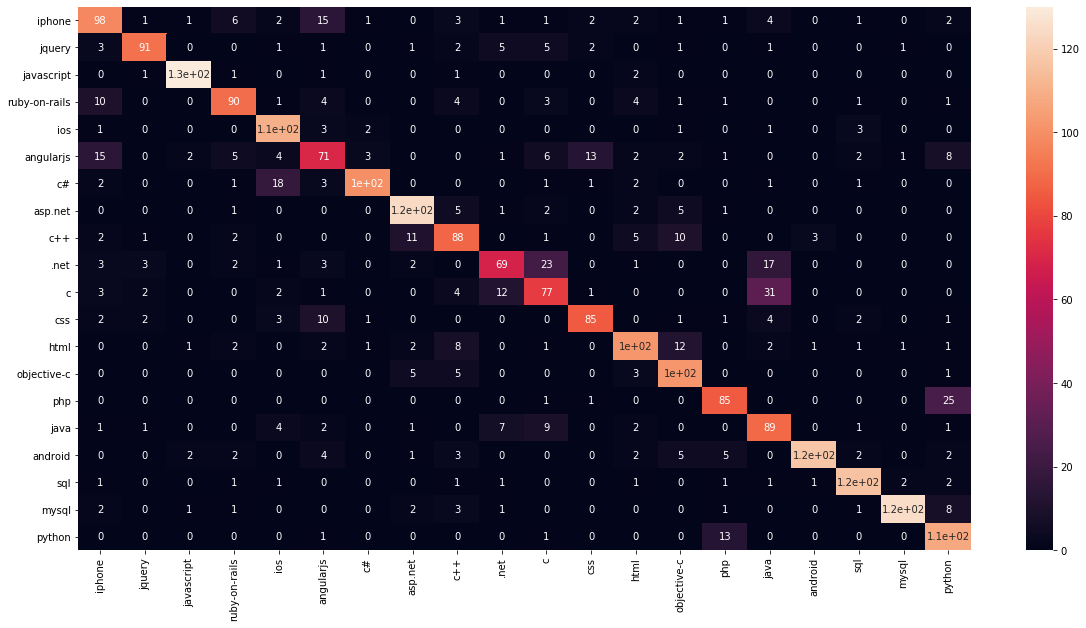

In [10]:
# inserte su código aquí
# print(metrics.confusion_matrix(y_test, y_pred_rf))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

matriz_confusion=metrics.confusion_matrix(y_test, y_pred_rf)
names_labels=list(tags.keys())
array = matriz_confusion
df_cm = pd.DataFrame(array, index = [i for i in names_labels],columns = [i for i in names_labels])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)

**¿El modelo es efectivo para todas las clases (etiquetas)?**

El modelo de Random Forest si es efectivo ya que muestra en su matriz de confusion una distribucion mayoritariamente correcta. Es decir, demuestra su efectividad al clasificar Verdaderos Positivos, a comparación de los Falsos Positivos (Matriz Triangular Superior) o Falsos Negativos (Matriz Triangular Inferior). 

Las clases de .NET y C muestran clasificaciones erroneas (que no son mayoritarias), y que posiblemente se puede disminuir o eliminar mediante otros N_ESTIMATORS al momento de entrenar el modelo.

**Intente mejorar los resultados de la siguiente manera:**
- Utilice Lemmatization y Stemming 
- Utilice sólamente Lemmatization
- Utilice sólamente Stemming

Analice sus resultados.

In [11]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize(doc):
  wordnet_lemmatizer = WordNetLemmatizer()
  lemmatized_docs = []
  for doc_tokens in doc:
    # print(f"{doc_tokens}\n")
    lemma_word = []
    for w in doc_tokens.split(' '):
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    lemmatized_docs.append(' '.join(lemma_word))
  return lemmatized_docs


# Stemming
from nltk.stem import PorterStemmer
def stemm(docs):
  ps = PorterStemmer()

  stemmed_docs = []
  for doc_tokens in docs:
    stemmed_words = []
    for w in doc_tokens.split(' '):
      rootWord = ps.stem(w)
      stemmed_words.append(rootWord)
    stemmed_docs.append(' '.join(stemmed_words))
  return stemmed_docs

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Freddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Utilizando Lemmatization y Stemming

In [12]:
X = df.post.copy()
X = lemmatize(X)
X = stemm(X)
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Optener la representación TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

# Entrenamiento NaiveBayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento SVM
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vertorized, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:

from sklearn import metrics

y_pred_navive_bayes = naive_bayes_classifier.predict(X_test_vertorized)
naive_bayes_score = metrics.accuracy_score(y_test, y_pred_navive_bayes)

y_pred_svm = svm_classifier.predict(X_test_vertorized)
svm_score = metrics.accuracy_score(y_test, y_pred_svm)


y_pred_rf = rf_classifier.predict(X_test_vertorized)
rf_score = metrics.accuracy_score(y_test, y_pred_rf)

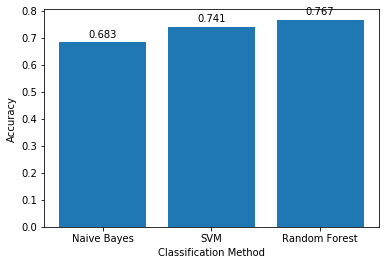

In [14]:
methos = ['Naive Bayes', 'SVM', 'Random Forest']
scores = [naive_bayes_score, svm_score, rf_score]

x = np.arange(len(scores))

fig, ax = plt.subplots()
rects = plt.bar(x, scores)
autolabel(rects)
plt.xticks(x, methos)
plt.xlabel("Classification Method")
plt.ylabel("Accuracy")
plt.show()

## Utilizando solo Stemming

In [15]:
X = df.post.copy()
X = stemm(X)
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Optener la representación TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

# Entrenamiento NaiveBayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento SVM
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vertorized, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
from sklearn import metrics

y_pred_navive_bayes = naive_bayes_classifier.predict(X_test_vertorized)
naive_bayes_score = metrics.accuracy_score(y_test, y_pred_navive_bayes)

y_pred_svm = svm_classifier.predict(X_test_vertorized)
svm_score = metrics.accuracy_score(y_test, y_pred_svm)


y_pred_rf = rf_classifier.predict(X_test_vertorized)
rf_score = metrics.accuracy_score(y_test, y_pred_rf)

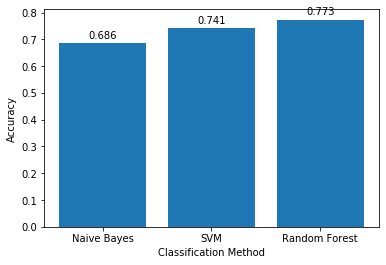

In [17]:
methos = ['Naive Bayes', 'SVM', 'Random Forest']
scores = [naive_bayes_score, svm_score, rf_score]

x = np.arange(len(scores))

fig, ax = plt.subplots()
rects = plt.bar(x, scores)
autolabel(rects)
plt.xticks(x, methos)
plt.xlabel("Classification Method")
plt.ylabel("Accuracy")
plt.show()

## Utilizando solo Lemmatization

In [18]:
X = df.post.copy()
X = lemmatize(X)
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Optener la representación TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

# Entrenamiento NaiveBayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento SVM
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_vertorized, y_train)

# Entrenamiento Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vertorized, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:

from sklearn import metrics

y_pred_navive_bayes = naive_bayes_classifier.predict(X_test_vertorized)
naive_bayes_score = metrics.accuracy_score(y_test, y_pred_navive_bayes)

y_pred_svm = svm_classifier.predict(X_test_vertorized)
svm_score = metrics.accuracy_score(y_test, y_pred_svm)


y_pred_rf = rf_classifier.predict(X_test_vertorized)
rf_score = metrics.accuracy_score(y_test, y_pred_rf)

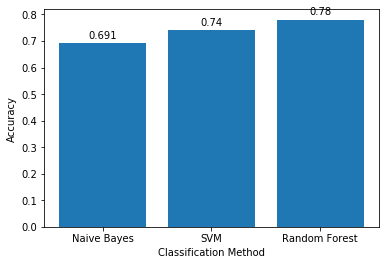

In [20]:
methos = ['Naive Bayes', 'SVM', 'Random Forest']
scores = [naive_bayes_score, svm_score, rf_score]

x = np.arange(len(scores))

fig, ax = plt.subplots()
rects = plt.bar(x, scores)
autolabel(rects)
plt.xticks(x, methos)
plt.xlabel("Classification Method")
plt.ylabel("Accuracy")
plt.show()

**Analice sus resultados.**

Los accuracys de los modelos usando lemmatization y stemming, solo lemmatization y solo stemming son similares. Estos valores se deben a que el dataset esta balanceado y que en el proceso inicial de eliminación de stopwords se limpió mayoritariamente el dataset. En cualquiera de los 3 casos se demostró una mayor eficacia con el uso de los modelos de Random Forest.

En la Tabla 1 se muestra los accuracys de cada modelo referente al previo tratamiento/normalización del texto mediante  Stemming y Lemmatización. 


|               | Acc. Lemmatización y Stemming | Acc. Stemming | Acc. Lemmatización |
|---------------|-------------------------------|---------------|--------------------|
| **Naive Bayes**   | 0.683                         | 0.686         | 0.691              |
| **SVM**           | 0.741                         | 0.741         | 0.741              |
| **Random Forest** | 0.768                         | 0.774         | 0.774              |
<br>

<center>Tabla 1. Accuracy de los Modelos según la normalización dada.</center>


## Ejercicio 4

Repetir el ejercicio 3, pero esta vez usando unigramas y bigramas.

**El ejercicio se realiza con el mejor resultado del Ej3, en este caso Random Forest**

In [21]:
X = df.post.copy()
X = lemmatize(X)
X = stemm(X)
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Optener la representación TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


## Se configura el vectorizer para usar unigramas y bigramas
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

# Entrenamiento Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vertorized, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred_rf = rf_classifier.predict(X_test_vertorized)
rf_score = metrics.accuracy_score(y_test, y_pred_rf)

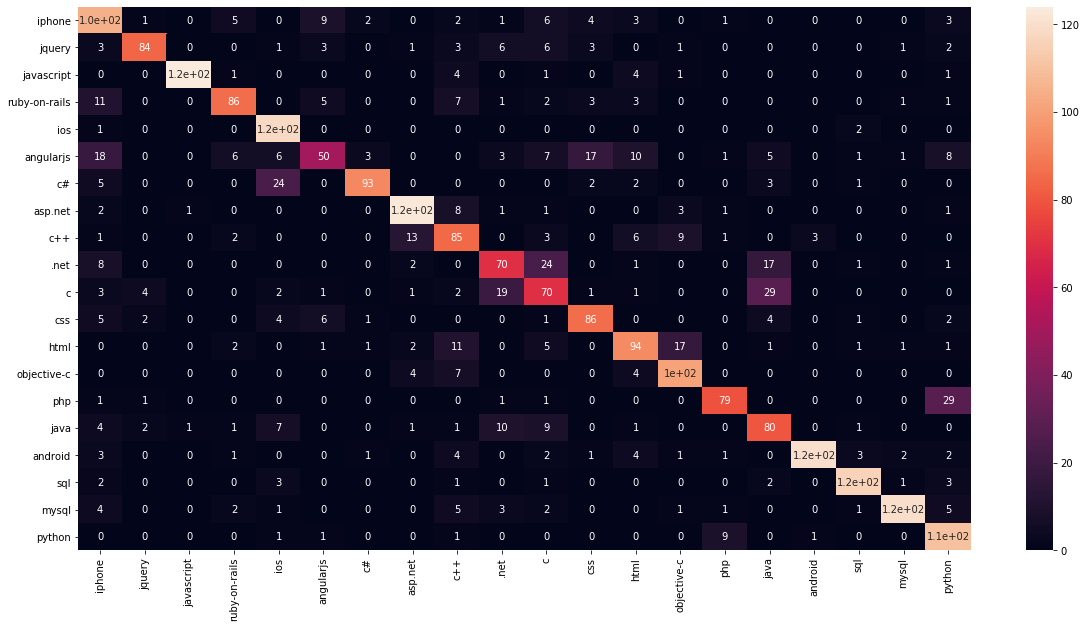

In [23]:
# inserte su código aquí
# print(metrics.confusion_matrix(y_test, y_pred_rf))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

matriz_confusion=metrics.confusion_matrix(y_test, y_pred_rf)
names_labels=list(tags.keys())
array = matriz_confusion
df_cm = pd.DataFrame(array, index = [i for i in names_labels],columns = [i for i in names_labels])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)

## Ejercicio 5

En base a los resultados anteriores, incluya el proceso de `feature selection` utilizando las funciones ` chi2` y `SelectKBest` del paquete `sklearn.feature_selection`. Para ello, pruebe varios valores de `k` (número de características seleccionadas). ¿Los resultados con respecto a los ejercicios anteriores han mejorado? analice su respuesta.

In [24]:
X = df.post.copy()
X = lemmatize(X)
X = stemm(X)
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Se configura el vectorizer para usar unigramas y bigramas
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

In [25]:
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

# Apply chi2 and SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import time

K_to_test = [2, 10, 50, 100, 500, 1000, 3000, 4000, 5000]

scores = {}
for k in K_to_test:
  # K en bucle
  chi2_selector = SelectKBest(chi2, k=k)
  X_train_kbest = chi2_selector.fit_transform(X_train_vertorized, y_train)
  X_test_kbest = chi2_selector.transform(X_test_vertorized)

  # Get time
  start_time = time.time()

  # Apply RandomForest
  rf_classifier=RandomForestClassifier(n_estimators=100)
  rf_classifier.fit(X_train_kbest, y_train)

  end_time = time.time() - start_time

  # Save accuracy
  y_pred_rf = rf_classifier.predict(X_test_kbest)
  rf_score = metrics.accuracy_score(y_test, y_pred_rf)
  scores[k] =  (rf_score, end_time)

In [26]:
scores

{2: (0.11654282362143137, 0.2700009346008301),
 10: (0.33985138834571765, 0.437000036239624),
 50: (0.6597575283535393, 1.601994276046753),
 100: (0.7117716073523661, 2.0970029830932617),
 500: (0.7485334376222136, 3.564999580383301),
 1000: (0.7571372702385608, 3.9520039558410645),
 3000: (0.7700430191630817, 4.674996614456177),
 4000: (0.7649589362534219, 4.9410035610198975),
 5000: (0.7630035197497067, 5.098998785018921)}

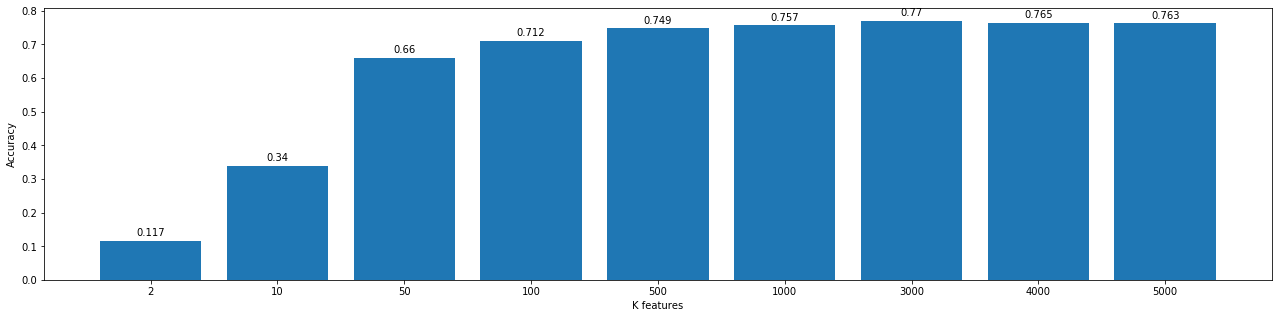

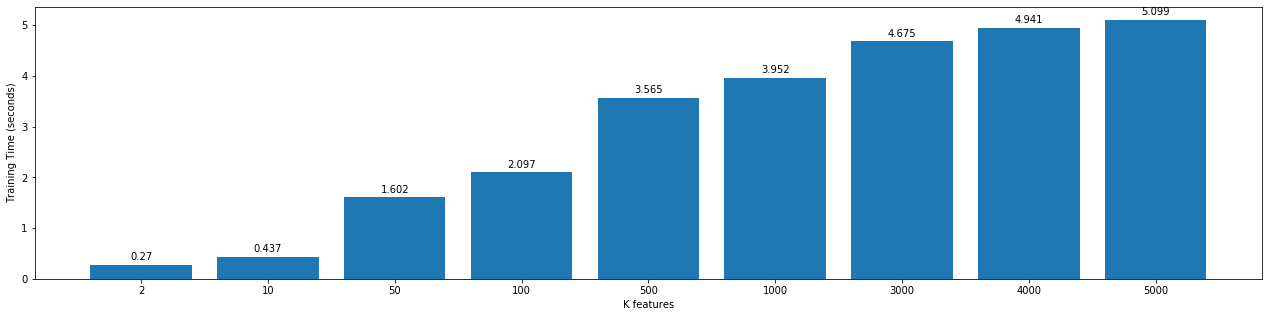

In [27]:
methos = scores.keys()
score_vals = [val[0] for (key, val) in scores.items()]
times = [val[1] for (key, val) in scores.items()]

# list(scores.items())[0]
x = np.arange(len(scores))

fig, ax = plt.subplots()
rects = plt.bar(x, score_vals)
autolabel(rects)

fig.set_size_inches(22, 5, forward=True)
plt.xticks(x, methos)
plt.xlabel("K features")
plt.ylabel("Accuracy")
plt.show()


fig, ax = plt.subplots()
rects = plt.bar(x, times)
autolabel(rects)

fig.set_size_inches(22, 5, forward=True)
plt.xticks(x, methos)
plt.xlabel("K features")
plt.ylabel("Training Time (seconds)")
plt.show()

**Pruebe varios valores de k (número de características seleccionadas). ¿Los resultados con respecto a los ejercicios anteriores han mejorado?**

Mediante el proceso de SelectorKBest y chi2 se desarrolló con k=[2, 10, 50, 100, 500, 1000, 3000, 4000, 5000]. Según los resultados mostrados en las penúltima gráfica (K Features vs Accuracy), el accuracy no mejoran númericamente si se utiliza este selector o no. Sin embargo, los resultados a nivel de tiempo de entrenamiento (última gráfica de K Features vs Training Time) si varían, y **mejoran**, permitiendo concluir que el SelectorKBest permite elegir menor número de k features sin arriesgar accuracy.

Por ejemplo:
- Con k=500 y k=1000 se obtiene un accuracy del 0.75, sin embargo, el tiempo de entrenamiento de k=500 es de 3.81 segundos a comparación de 4.28 segundos del k=1000. Es demuestra, **un mejor uso de recursos temporales al usar el SelectoKBest.**